<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_2_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DM Lab 2: Preprocessing data**


*   MSSV: **21130429**
*   Ho ten: **Phạm Tiến Lộc**



# Importing libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Mount to drive

In [3]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd '/content/gdrive/MyDrive/data'
except ImportError as e:
    print('Cannot mount to your folder')

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#**Task1**: Simple Preprocessing and Visualization

### 1.1 Load and display 10 first students in the dataset

In [4]:
#code
st = pd.read_csv('students.csv', encoding='ISO-8859-1')
st.head(10)

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13
5,FSS2010,Susanne Müller,Database Systems I,3.0,12
6,FSS2010,Avid Morvita,Database Systems I,4.0,13
7,FSS2010,Steve Queck,Database Systems I,2.7,8
8,FSS2010,Michaela Martke,Database Systems I,5.0,5
9,FSS2010,Ulrich Gester,Database Systems I,5.0,7


##1.2 What is the most common mark that has been given in FSS2010 (using histogram)?


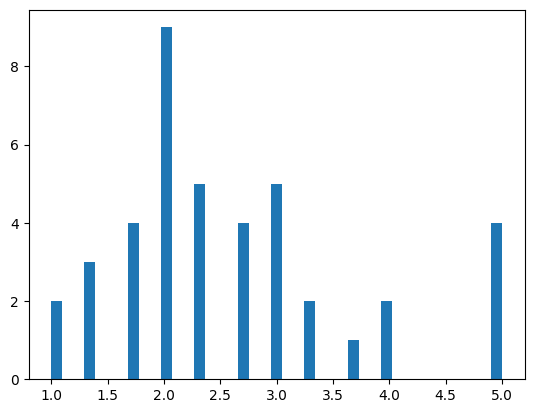

In [5]:
#code
data = st[st['Semester'] == 'FSS2010']
plt.hist(st['Mark'], bins=len(st['Mark']))
plt.show()

# Điểm xuất hiện nhiều nhất của học kỳ FSS2010 là điểm 2.0

#1.3. Plot the correlation between attributes in the dataset

> **Syntax**: *df.corr(method, min_periods,numeric_only)*

*  **method**: In method we can choose any one from {'pearson', 'kendall', 'spearman'} pearson is the standard correlation coefficient matrix i.e default
*  **min_periods**: int This is optional. Defines th eminimum number of observations required per pair.
*  **numeric_only**: Default is False, Defines we want to compare only numeric or categorical object also

In [6]:
#code
correlation = st.corr(method='pearson', numeric_only=True)
correlation

,Mark,Attended
Mark,1.000000,-0.301655
Attended,-0.301655,1.000000


##1.3. Is there a correlation between the **mark** and the **number of attended classes**?

*   Find the answer using a scatter plot




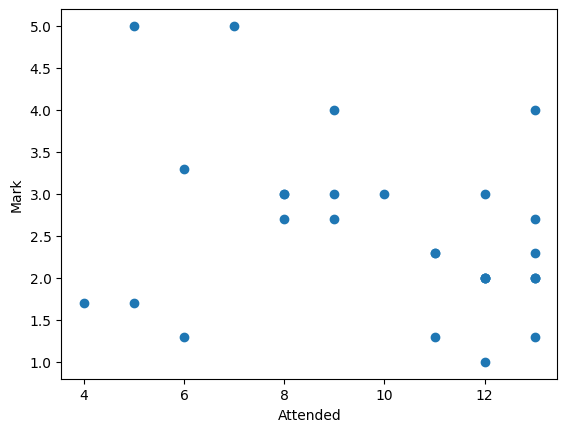

In [7]:
#code
plt.scatter(data['Attended'], data['Mark'])
plt.xlabel('Attended')
plt.ylabel('Mark')
plt.show()

##1.4. Whether the correlation is held for all students (**hint**: use a scatter plot).

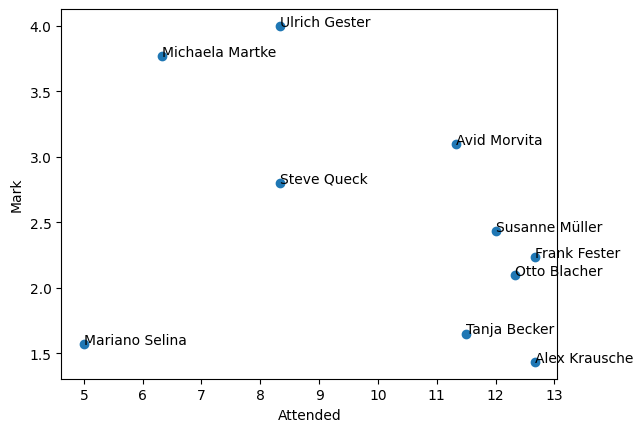

In [8]:
#code
data_group = data.groupby('Name').mean(numeric_only=True)

data_group.head()

plt.scatter(data_group['Attended'], data_group['Mark'])
plt.xlabel('Attended')
plt.ylabel('Mark')

for(name, mark, attended) in data_group.itertuples():
  plt.annotate(name, (attended, mark))

plt.show()



---



#**Task 2**. With Iris dataset

##2.1 Load iris dataset
The dataset describes three types of Iris flowers:
- Setosa
- Virginica
- Versicolour

There are four (non-class) attributes
- Sepal width and length
- Petal width and length

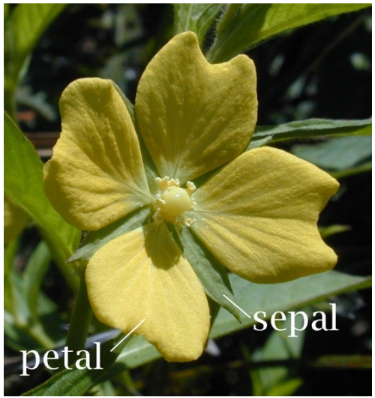

In [9]:
#code
iris = pd.read_csv('iris.csv')
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Task 2.2. Use scatter plot to visualise and find out the best combination two features in classifing different types of iris flowers?
**Combinations**:


*   ['SepalLength', 'SepalWidth']
*   ['PetalLength', 'PetalWidth']
*   ['SepalLength','PetalLength']
*   ['SepalLength','PetalWidth']
*   ['SepalWidth', 'PetalWidth']
*   ['SepalWidth','PetalLength']



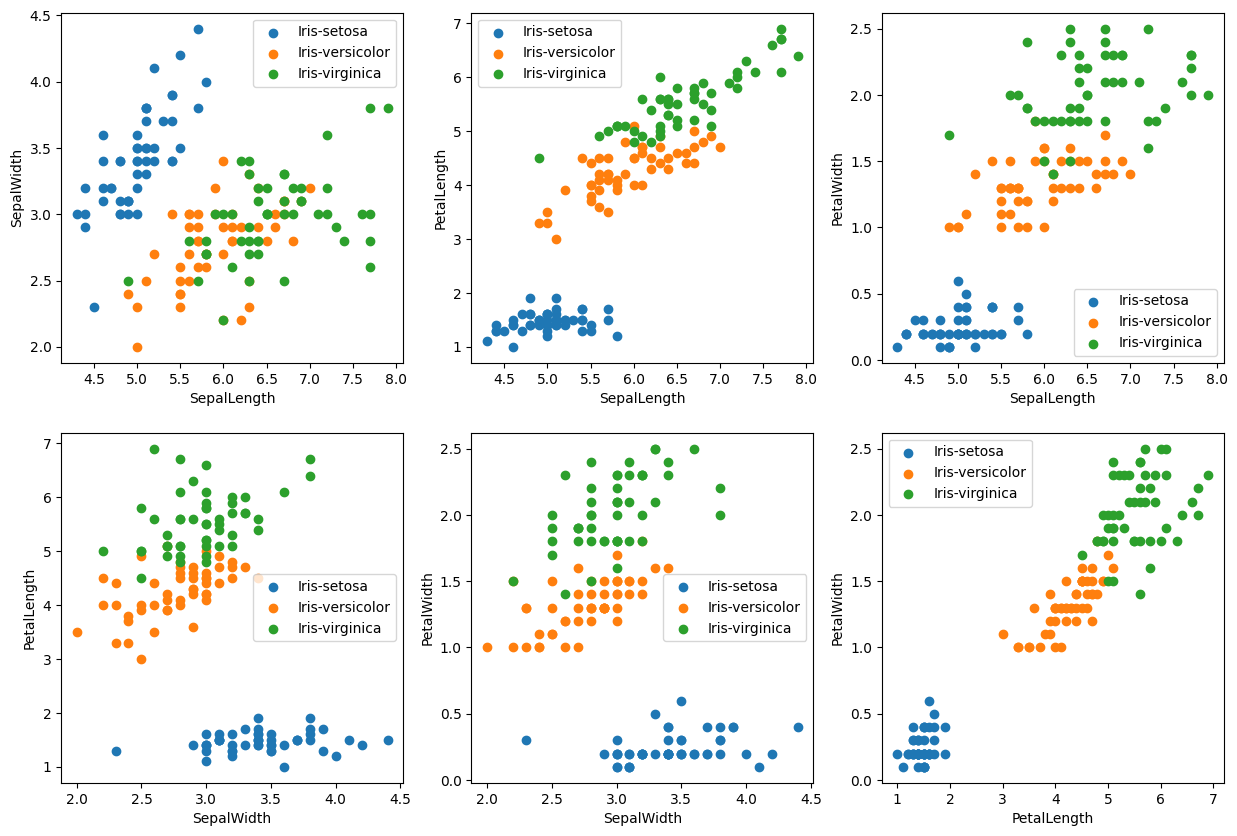

In [10]:
#code
features = ['SepalLength', 'SepalWidth','PetalLength', 'PetalWidth']

combinations = itertools.combinations(features,2)

fig = plt.figure(figsize=(15,10))

figure_index = 1

for combination in combinations:
  axs = fig.add_subplot(2,3, figure_index)

  for name, group in iris.groupby('Name'):
    axs.scatter(group[combination[0]], group[combination[1]], label=name)

  axs.set_xlabel(combination[0])
  axs.set_ylabel(combination[1])

  figure_index +=1

  plt.legend()
plt.show()

# Sự kết hợp tốt nhất giữa 2 thuộc tính là ['PetalLength', 'PetalWidth']

#Task 2.3. Apply StandardScaler to non-class attributes

In [18]:
#code
sc = StandardScaler()
iris_sc = sc.fit_transform(iris.drop(columns="Name"))
iris_sc_df = pd.DataFrame(data=iris_sc, columns=features)
iris_sc_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977




---



#**Task 3**. With Titanic dataset

##Task 3.1. Load the Titanic dataset and show its detail (using **info()** function)

In [82]:
#code
titanic = pd.read_csv('titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Task 3.2. Which attributes have missing values? Plot missing percentages for these attributes.

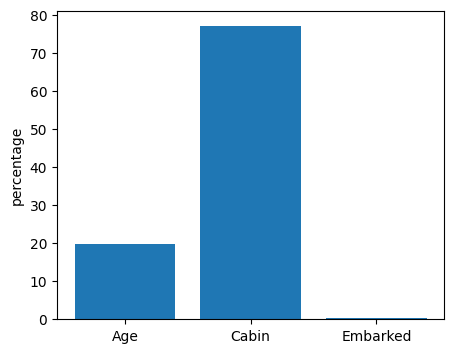

In [83]:
#code
m_value = titanic.isnull().sum()
m_percent = (m_value / len(titanic)) * 100
m_data = m_percent[m_percent > 0]

plt.figure(figsize=(5, 4))
plt.bar(m_data.index, m_data.values)
plt.ylabel('percentage')
plt.show()

#Task 3.3. Fill missing values for these attributes using **SimpleImputer** with approriate strategy (mean, median, most_frequent, constant)

In [84]:
#code
age_imputer = SimpleImputer(strategy='mean')
titanic['Age'] = age_imputer.fit_transform(titanic[['Age']])

# Task 3.4. Discretize age values into **5 bins**. Then, plot the histogram of age to identify the most popular age interval.

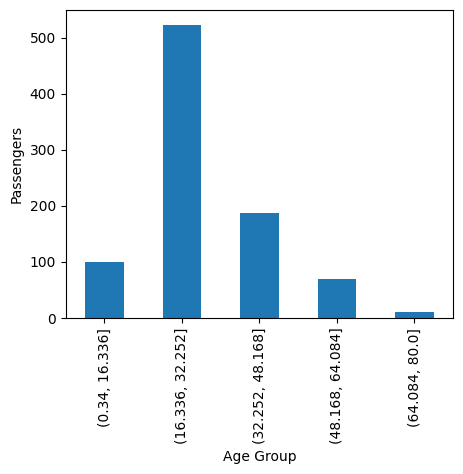

In [85]:
#code
titanic['Age Group'] = pd.cut(titanic['Age'], bins=5)

plt.figure(figsize=(5, 4))
titanic['Age Group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Passengers')
plt.show()
# Nhóm tuổi phổ biến nhất là 16 đến 32

#Task 3.5. Convert sex values into numeric values using **dummy** approach

In [86]:
#code
titanic = pd.get_dummies(titanic, columns=['Sex'])
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Embarked         Age Group  Sex_female  \
0         A/5 21171   7.2500   NaN        S  (16.336, 32.252]       False   
1          PC 17599  71.2833   C85        C  (32.252, 48.168]        True   
2  STON/O2. 3101282   7.9250   NaN        S  (16.336, 32.252]        True   
3            11380